##Import necessary packages

In [1]:
import numpy as np
import json
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


## Fetch the data

In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip 'annotations_trainval2017.zip'

--2021-12-27 14:52:16--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.68.204
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.68.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  74.6MB/s    in 3.2s    

2021-12-27 14:52:20 (74.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


## Load the .JSON file

In [3]:
file_data = open('/content/annotations/instances_train2017.json')
annotation = json.load(file_data)
print(annotation.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [4]:
print(annotation['annotations'][302])

{'segmentation': [[414.23, 355.52, 413.41, 353.45, 410.52, 348.91, 412.17, 344.37, 413.0, 341.48, 410.93, 335.69, 410.1, 326.61, 409.28, 317.52, 417.13, 317.52, 422.49, 326.61, 423.73, 320.83, 423.73, 310.09, 423.73, 302.24, 424.15, 289.44, 424.97, 280.35, 428.28, 274.16, 431.58, 279.52, 438.19, 286.96, 434.06, 279.94, 435.71, 265.48, 439.84, 260.53, 441.49, 270.03, 443.56, 275.81, 444.8, 263.42, 449.75, 253.92, 450.17, 257.22, 450.17, 263.0, 451.41, 275.81, 451.82, 289.85, 448.51, 298.52, 448.93, 308.44, 446.86, 314.63, 450.58, 315.04, 450.17, 318.35, 450.58, 321.65, 455.12, 320.83, 457.19, 322.89, 455.12, 328.67, 454.71, 335.28, 452.65, 339.82, 452.23, 343.54, 450.99, 345.19, 450.58, 346.85, 450.17, 352.63, 447.28, 358.41, 444.8, 359.65, 441.49, 357.58, 434.06, 356.35, 430.76, 357.58, 428.69, 358.41, 421.26, 358.41, 416.71, 357.58]], 'area': 2874.758300000001, 'iscrowd': 0, 'image_id': 429807, 'bbox': [409.28, 253.92, 47.91, 105.73], 'category_id': 64, 'id': 26066}


In [5]:
print("ANALYSIS OF THE ANNOTATED DATASET")
print("Number of images: " + str(len(annotation['images'])))
print("Total number of annotated boxes: " + str(len(annotation['annotations'])))
print("Total number of categories/classes: " + str(len(annotation['categories'])))

ANALYSIS OF THE ANNOTATED DATASET
Number of images: 118287
Total number of annotated boxes: 860001
Total number of categories/classes: 80


In [6]:
images_dataframe = pd.DataFrame(annotation['images'], columns = annotation['images'][0].keys())
annotations_dataframe = pd.DataFrame(annotation['annotations'], columns = annotation['annotations'][0].keys())

In [7]:
annotation_map= pd.concat([images_dataframe, annotations_dataframe], 1)[['file_name', 'width', 'height', 'bbox']]
box_df = pd.DataFrame(annotation_map['bbox'].values.tolist(), columns =['x', 'y', 'box_width', 'box_height'])
annotation_map = pd.concat([annotation_map, box_df], 1)
annotation_map = annotation_map.drop('bbox', axis =1)

In [8]:
annotation_map

,file_name,width,height,x,y,box_width,box_height
0,000000391895.jpg,640.0,360.0,199.84,200.46,77.71,70.88
1,000000522418.jpg,640.0,480.0,234.22,317.11,149.39,38.55
2,000000184613.jpg,500.0,336.0,239.48,347.87,160.00,57.81
3,000000318219.jpg,556.0,640.0,296.65,388.33,1.03,0.00
4,000000554625.jpg,426.0,640.0,251.87,333.42,125.94,22.71
...,...,...,...,...,...,...,...
859996,NaN,NaN,NaN,40.00,104.00,394.00,43.00
859997,NaN,NaN,NaN,137.00,195.00,140.00,138.00
859998,NaN,NaN,NaN,476.00,200.00,153.00,85.00
859999,NaN,NaN,NaN,275.00,207.00,153.00,148.00


In [9]:
annotation_map.isna().sum()

file_name     741714
width         741714
height        741714
x                  0
y                  0
box_width          0
box_height         0
dtype: int64

In [10]:
annotation_map = annotation_map.dropna() 
annotation_map.isnull().any()

file_name     False
width         False
height        False
x             False
y             False
box_width     False
box_height    False
dtype: bool

In [11]:
annotation_array = annotation_map[["width", "height"]].to_numpy()

## SCALING

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

after_scaling = scaler.fit_transform(annotation_array)
after_scaling

array([[1.        , 0.524618  ],
       [1.        , 0.72835314],
       [0.75903614, 0.48387097],
       ...,
       [1.        , 0.72835314],
       [0.75903614, 0.55008489],
       [0.75903614, 0.55008489]])

## KMeans Clustering technique

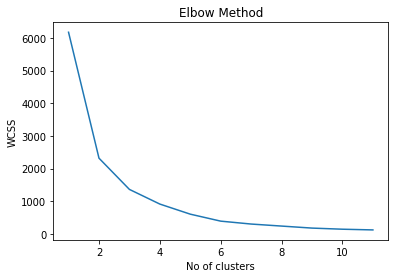

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 36)
    kmeans.fit(after_scaling)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

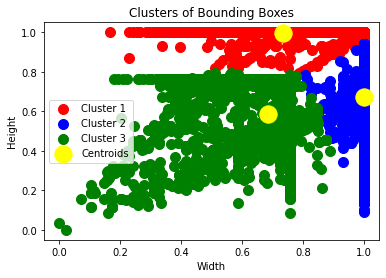

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 36)
y_kmeans = kmeans.fit_predict(after_scaling)

# Visualising the clusters
plt.scatter(after_scaling[y_kmeans == 0, 0], after_scaling[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(after_scaling[y_kmeans == 1, 0], after_scaling[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(after_scaling[y_kmeans == 2, 0], after_scaling[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Bounding Boxes')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.show()

In [15]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

def plot_boxes(cluster_centers):
    
    xdata = np.array([0.5]*len(cluster_centers))
    ydata = np.array([0.5]*len(cluster_centers))

    xerror = np.array([list(np.exp(cluster_centers[:, 0])/2)]*2)
    yerror = np.array([list(np.exp(cluster_centers[:, 1])/2)]*2)

    errorboxes = []

    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    pc = PatchCollection(errorboxes, facecolor='None', alpha=1, edgecolor='r')
    fig, ax = plt.subplots(1)

    ax.add_collection(pc)
    plt.title(f'Anchor Boxes for k = {len(cluster_centers)}')
    artists = plt.errorbar(xdata, ydata, xerr=xerror, yerr=yerror, fmt='None', ecolor='None')

## Anchor Boxes: 3,4,5,6,7

Anchor Box sizes for k = 3


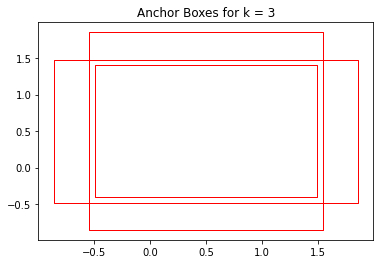

In [16]:
print("Anchor Box sizes for k = 3")
scaler.inverse_transform(kmeans.cluster_centers_)
plot_boxes(kmeans.cluster_centers_)

Anchor Box sizes for k = 4


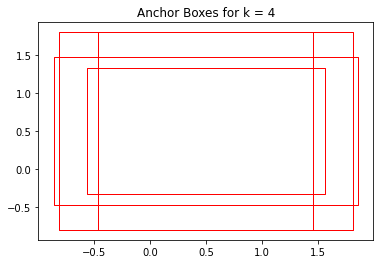

In [17]:
kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 36)
y_kmeans_4 = kmeans_4.fit_predict(after_scaling)

print("Anchor Box sizes for k = 4")
scaler.inverse_transform(kmeans_4.cluster_centers_)
plot_boxes(kmeans_4.cluster_centers_)

Anchor Box sizes for k = 5


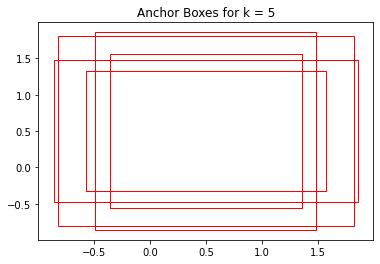

In [18]:
kmeans_5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 36)
y_kmeans_5 = kmeans_5.fit_predict(after_scaling)

print("Anchor Box sizes for k = 5")
scaler.inverse_transform(kmeans_5.cluster_centers_)
plot_boxes(kmeans_5.cluster_centers_)

Anchor Box sizes for k = 6


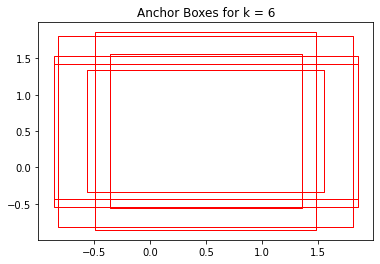

In [19]:
kmeans_6 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 36)
y_kmeans_6 = kmeans_6.fit_predict(after_scaling)

print("Anchor Box sizes for k = 6")
scaler.inverse_transform(kmeans_6.cluster_centers_)
plot_boxes(kmeans_6.cluster_centers_)